In [1]:
import pandas as pd
import numpy as np
import collections

from sklearn.feature_extraction.text import TfidfVectorizer
# from local_helpers.clustering import get_topic_cluster_mapping, , 
# from local_helpers.clustering import update_default_dict, print_dict_items
from clustering_helpers import (article_clustering,
                                top_topic_words, 
                                gen_nmf_tfidf_model,
                                get_top_words)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read in Data
df1 = pd.read_parquet('../data/articles_preprocessed.parquet', engine = 'pyarrow')
df2 = pd.read_parquet('../data/articles_preprocessed_87_99.parquet', engine = 'pyarrow')
df = df1.append(df2)
del df1, df2
df = (
    df
    .drop_duplicates(subset = ['url'])
    .reset_index(drop=True))

/anaconda3/envs/nlp/lib/python3.7/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/anaconda3/envs/nlp/lib/python3.7/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/anaconda3/envs/nlp/lib/python3.7/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [3]:
df.head()

,article_text,title,url,year,text_final
0,"LEBANON, Tenn. — The last time Kenneth Seay lo...",Driver’s License Suspensions Create Cycle of Debt,https://www.nytimes.com/2015/04/15/us/with-dri...,2015,"Lebanon , Tennessee — time Kenneth Seay lose j..."
1,A touring Shakespearean troupe arrives in a sm...,"BEHT HENLEY WRITES A 'REAL, REAL PERSONAL' MOVIE",https://www.nytimes.com/1986/11/02/movies/beht...,1986,tour shakespearean_POS_ADJ troupe arrive small...
2,"Dr. Richard R. Green, the beleaguered New York...","Metro Matters; The Time Clocks, The Chancellor...",https://www.nytimes.com/1988/12/01/nyregion/me...,1988,"Dr. Richard R. Green , beleaguered_POS_ADJ New..."
3,A CURIOUS smell began wafting across the Soho ...,"FOREIGN REPORT: LONDON; This Blessed Plot, Thi...",https://www.nytimes.com/2004/02/29/style/forei...,2004,Curious smell begin waft Soho district early_P...
4,"A onetime conglomerate, Savia, said it was sel...",World Business Briefing | Americas: Mexico: Se...,https://www.nytimes.com/2003/06/03/business/wo...,2003,"onetime_POS_ADJ conglomerate , Savia , say sel..."


### Article Clustering
First we cluster all of the articles into different topics. Then we take the top words for each topic and treat each of those as separate documents, these documents are then clustered to find similar topics over time, to make the hand labeling of categories a quick process.

In [4]:
#initialize variables to be used to store analysis
intervals = [(i,i+3) for i in range(1981, 2016, 4)]
interval_outputs, final_article_df = article_clustering(df, intervals)
final_article_df.head()

(1981, 1984)
(1985, 1988)
(1989, 1992)
(1993, 1996)
(1997, 2000)
(2001, 2004)
(2005, 2008)
(2009, 2012)
(2013, 2016)


,text_final,categ,years
21,board cooperative condominium currently_POS_AD...,2,1981 - 1984
24,man give conditional_POS_ADJ discharge prison ...,5,1981 - 1984
27,Soviet Union rigidly_POS_ADV centralize econom...,3,1981 - 1984
37,"year ago_POS_ADV , speak american_POS_ADJ pain...",2,1981 - 1984
52,"Governor Carey Senate Republican leader , Warr...",5,1981 - 1984


In [5]:
final_topic_df = top_topic_words(interval_outputs, intervals)

In [6]:
pd.options.display.max_colwidth = 300
final_topic_df[['cluster','years','words_only']]

,cluster,years,words_only
0,0,1981 - 1984,tax budget reagan house billion senate cut spending deficit bill president administration congress program committee democrats percent senator increase taxis vote white fiscal_pos_adj proposal income republicans economic_pos_adj republican rate propose
1,1,1981 - 1984,company percent price million market stock oil share sale rise analyst d1 rate quarter industry billion decline sell business increase earning corporation profit fall trading product report steel computer new_pos_adj
2,2,1981 - 1984,dr street school work people child building like student art new avenue woman old_pos_adj miss mrs room man life time music park day know family theater house find 000 look
3,3,1981 - 1984,united states israel soviet_pos_adj israeli_pos_adj lebanon official american_pos_adj reagan military_pos_adj soviet missile force beirut administration government minister union lebanese_pos_adj president a1 country troop arm leader army nuclear_pos_adj moscow today guerrilla
4,4,1981 - 1984,game play team season player score win coach yard ball hit run league second_pos_adj goal shot pass victory lead point field yankees giants get time throw go pitch football good_pos_adj
5,5,1981 - 1984,mr mondale party campaign reagan candidate president election company democratic_pos_adj hart vote political_pos_adj chairman senator white leader republican_pos_adj mrs committee county voter office jackson aide ask charge investigation tell meeting
6,6,1981 - 1984,city state court new a1 judge county york law federal mayor case police department justice governor official district million agency koch commission school authority plan 000 board jersey service system
7,7,1981 - 1984,bank rate loan interest banking percent fund deposit money fed mortgage banker billion reserve debt federal saving credit institution market treasury payment financial_pos_adj account country asset bond economist continental term
8,0,1985 - 1988,building city foot apartment 000 project housing square_pos_adj street developer space development new site build avenue park construction unit rent town office bedroom area condominium tenant york county design house
9,1,1985 - 1988,company stock market percent price million bank share d1 billion analyst rate rise dollar oil trading sale sell business industry quarter investor offer trade fall corporation bond buy index decline


In [7]:
final_article_df = (
    final_article_df
    .join(df['year'])
    .sort_index())

##### Topic Clustering

Here we take the clusters of topics which were generated on a yearly basis and see if we can cluster the topics.  The advantage of this approach is that we can see different subtopics emerge at different points of time.  We will then use these key words which are generated to label each topic as either `business`, `politics`, `sports`, `foreign affairs`, `medicine`, and `culture`.

In [8]:
tfidf  = TfidfVectorizer(max_df=0.80, min_df=2, max_features= 500)
topic_output = gen_nmf_tfidf_model(final_topic_df['topic_words_weighted'], n_topics = 8, tfidf_vectorizer=tfidf)
top_30words_topics = get_top_words(topic_output['nmf'], topic_output['tfidf_vectorizer'],n_top_words=30)

In [9]:
for j in top_30words_topics:
    print('------------------------------------')
    print([i[1] for i in top_30words_topics[j]])

------------------------------------
['mr', 'campaign', 'party', 'candidate', 'clinton', 'election', 'bush', 'president', 'obama', 'political_pos_adj', 'democratic_pos_adj', 'republican_pos_adj', 'senator', 'voter', 'vote', 'democrats', 'republicans', 'white', 'mrs', 'lawyer', 'senate', 'governor', 'republican', 'state', 'house', 'chairman', 'court', 'committee', 'case', 'charge']
------------------------------------
['game', 'team', 'season', 'player', 'play', 'coach', 'win', 'yankees', 'league', 'ball', 'score', 'run', 'hit', 'giants', 'knicks', 'yard', 'mets', 'point', 'pitch', 'victory', 'field', 'inning', 'second_pos_adj', 'go', 'shot', 'lead', 'football', 'baseball', 'throw', 'fan']
------------------------------------
['company', 'percent', 'market', 'stock', 'bank', 'price', 'million', 'billion', 'sale', 'share', 'business', 'analyst', 'rate', 'investor', 'industry', 'sell', 'executive', 'rise', 'd1', 'quarter', 'oil', 'fall', 'profit', 'loan', 'computer', 'bond', 'economy', 'n

In [10]:
key_words = {'politics': ['campaign', 'party', 'candidate', 'election', 'bush', 'president', 
                          'political_pos_adj', 'republican_pos_adj', 'vote', 'voter', 'senator', 
                          'democratic_pos_adj', 'democrats', 'republicans', 'lawyer', 'senate', 'state', 
                           'republican', 'court', 'chairman', 'officer', 'judge', 'department', 'law', 
                           'official', 'case',  'justice', 'district', 'federal', 
                           'tax', 'budget', 'bill', 'cut', 'congress', 
                           'spending', 'committee', 'deficit', 'program', 'proposal', 
                           'administration', 'fiscal_pos_adj'],
             'local':['city', 'new', 'york', 'mayor', 'state', 'court', 'county', 'judge', 'department',
                      'jersey', 'school','giuliani', 'justice', 'arrest', 'district', 'federal',
                      'crime', 'plan', 'charge','governor'],
             'sport': ['game', 'team', 'player', 'season', 'play', 'coach', 'yankees', 'win', 'league', 'ball', 
                       'score', 'run', 'hit', 'giants', 'knicks', 'mets', 'point', 'yard', 'pitch', 'victory', 
                       'inning', 'go', 'field', 'second_pos_adj', 'shot', 'lead', 'football', 'throw', 'baseball', 
                       'fan'],
             'business': ['company', 'percent', 'market', 'stock', 'price', 'bank', 'million', 'billion', 'sale', 
                          'share', 'business', 'analyst', 'rate', 'industry', 'investor', 'sell', 'executive', 
                         'rise', 'd1', 'quarter', 'oil', 'fall', 'profit', 'loan', 'bond', 'new_pos_adj', 'economy',
                         'computer', 'buy', 'chief_pos_adj'],
             'foreign affairs': ['iraq', 'military_pos_adj', 'government', 'war', 'force', 'soviet_pos_adj', 'troop',
                                 'iraqi_pos_adj', 'nations', 'security', 'attack', 'minister', 'soviet', 'army',
                                 'soldier', 'israel', 'intelligence', 'iran'],
             'medicine': ['dr', 'patient', 'drug', 'doctor', 'health', 'hospital', 'disease', 'medical_pos_adj', 
                          'care', 'test', 'cancer', 'scientist', 'researcher', 'treatment', 'research', 
                          'medicine'],
             'culture': ['film', 'music', 'book', 'art', 'theater','movie', 'play', 'song',
                         'museum', 'design','opera', 'musical_pos_adj', 'orchestra', 'actor',
                         'stage', 'producer', 'director']}

In [11]:
keyword_scores1 = {}
for key in key_words:
    keyword_scores1[key] = (
        final_topic_df['words_only'].str.split(' ')
        .apply(lambda x: int(100* round(len(set(x) & set(key_words[key]))
               /float(len(key_words[key])), 4))))
    
keyword_scores1 = pd.DataFrame(keyword_scores1).reset_index()

In [12]:
max_scores1 = (
    pd.melt(keyword_scores1, id_vars='index')
    .groupby('index').max()
    .reset_index()[['index','value']]
    .set_index(['index','value']))

all_scores1 = (
    pd.melt(keyword_scores1, id_vars='index')
    .set_index(['index','value']))

topic_matches1 = (
    max_scores1
    .join(all_scores1, on = ['index','value'])
    .reset_index().set_index('index')
    .drop('value',axis=1)
    .rename(columns = {'variable':'pct_column'})
)

In [13]:
final_topic_df.head()

,cluster,topic_words_weighted,years,words_only
0,0,tax tax tax tax tax tax tax tax tax tax tax tax tax tax tax tax tax tax tax tax tax tax tax tax tax tax tax tax tax tax tax tax budget budget budget budget budget budget budget budget budget budget budget budget budget budget budget budget budget budget budget budget budget budget budget budget ...,1981 - 1984,tax budget reagan house billion senate cut spending deficit bill president administration congress program committee democrats percent senator increase taxis vote white fiscal_pos_adj proposal income republicans economic_pos_adj republican rate propose
1,1,company company company company company company company company company company company company company company company company company company company company company company company company company company company company company company company company company company company percent percent ...,1981 - 1984,company percent price million market stock oil share sale rise analyst d1 rate quarter industry billion decline sell business increase earning corporation profit fall trading product report steel computer new_pos_adj
2,2,dr dr dr dr dr dr dr dr dr dr dr dr dr dr street street street street street street street street street street street street street school school school school school school school school school school school school work work work work work work work work work work work people people people peo...,1981 - 1984,dr street school work people child building like student art new avenue woman old_pos_adj miss mrs room man life time music park day know family theater house find 000 look
3,3,united united united united united united united united united united united united united united united united united united united states states states states states states states states states states states states states states states states states states israel israel israel israel israel is...,1981 - 1984,united states israel soviet_pos_adj israeli_pos_adj lebanon official american_pos_adj reagan military_pos_adj soviet missile force beirut administration government minister union lebanese_pos_adj president a1 country troop arm leader army nuclear_pos_adj moscow today guerrilla
4,4,game game game game game game game game game game game game game game game game game game game game game game game game game game game game game game game game game game play play play play play play play play play play play play play play play play play play play play team team team team team t...,1981 - 1984,game play team season player score win coach yard ball hit run league second_pos_adj goal shot pass victory lead point field yankees giants get time throw go pitch football good_pos_adj


Use 20% as threshold for each topic.

In [14]:
final_topic_df = (
    final_topic_df
    .join(topic_matches1[max_scores1.reset_index()['value']>20])
    .fillna('NAP'))

In [15]:
final_article_df = (
    final_article_df
    .rename(columns={'categ':'cluster'})
    .set_index(['cluster','years'])
    .join(final_topic_df[['cluster','years','pct_column']]
          .set_index(['cluster','years']))
    .reset_index().drop('cluster',axis=1)
)


In [16]:
final_article_df.head()

,years,text_final,year,pct_column
0,1981 - 1984,"Senate Republican leader tell White House official today Congress reject new_POS_ADJ round budget cut propose President Reagan fiscal_POS_ADJ year . closed_POS_ADJ meeting , Senators urge Administration focus instead_POS_ADV reduction budget fiscal_POS_ADJ year 1983 1984 , accord participant mee...",1981,politics
1,1981 - 1984,"House Senate conferee today kill Senate - approve proposal prohibit housing subsidy locality , New York City , rent control new_POS_ADJ vacant_POS_ADJ housing . measure attach Senate $ 37 billion package budget cut , Senate conferee , delete rent control provision , say expect House conferee con...",1981,politics
2,1981 - 1984,"Senator Bob Dole , chairman tax - write Senate Finance Committee , say today Congress pass selective_POS_ADJ tax increase year , particularly_POS_ADV commercial_POS_ADJ bank thrift institution possibly_POS_ADV insurance company . Senator remark point possibility enactment omnibus_POS_ADJ tax bil...",1983,politics
3,1981 - 1984,"1981 tax act draw fire provision allow company sell unused_POS_ADJ tax benefit company , practice know safe_POS_ADJ - harbor leasing . measure , major_POS_ADJ company , General Electric , million dollar income able_POS_ADJ pay little_POS_ADJ american_POS_ADJ taxis 1982 . , Occidental Petroleum ,...",1982,politics
4,1981 - 1984,"Reagan Administration today forward 20-year_POS_ADJ plan modernize age air traffic control system say cost , $ 9 billion decade , meet chiefly_POS_ADV taxis ticket , fuel item . Congress approve new_POS_ADJ taxis . J. Lynn Helms , head Federal Aviation Administration , say program large_POS_ADJ ...",1982,politics


In [17]:
total_year_counts = (final_article_df
                     .groupby('years').count()
                     .rename(columns={'pct_column':'total_count'})
                     .drop('text_final',axis=1))

total_year_props = (
    pd.merge(final_article_df
             .groupby(['years','pct_column']).count()
             .reset_index(),
             total_year_counts,
             on = 'years')
    .rename(columns = {'text_final':'article_count'})
)
total_year_props['topic_prop'] = (
    total_year_props['article_count']/total_year_props['total_count'])

total_year_props['final_year'] = total_year_props['years'].str[-5:].astype(int)

cols = {col_type:total_year_props[total_year_props['pct_column']==col_type].set_index('final_year')['article_count'] 
        for col_type in total_year_props['pct_column'].unique()}

categ_ot = pd.DataFrame(cols).fillna(0)

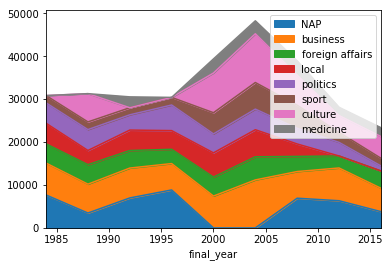

In [18]:
categ_ot.plot.area()
plt.show()

In [20]:
final_article_df.rename(columns = {'pct_column':'categ'}).to_csv('../data/articles_categs.csv')